# Erica Brophy 520 Final Project
COVID-19 viral genome sequence comparison for interested region 13,000 to 21,000. 
https://www.cdc.gov/coronavirus/2019-ncov/downloads/genomic-characterization-of-2019-nCoV-Lancet-1-29-2020.pdf

In [1]:
from Bio.Seq import Seq
from Bio import SeqIO
import pandas as pd
import numpy as np
import PyPDF2 
from tabula import read_pdf
from io import StringIO
from skbio import DistanceMatrix
from Bio.Cluster import distancematrix
import numpy as np    
from Levenshtein import distance
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import sgt
sgt.__version__
from sgt import SGT
import pandarallel
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Import FASTA files for 15 human patient viral genomes and 1 bat viral genome. Create a biopython dictionary with sequence, sequence ID, and sequence record.

In [2]:
#genome402131 -> bat_seq
for seq_record in SeqIO.parse("EPI_ISL_402131.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
bat_sequence = SeqIO.read("EPI_ISL_402131.fasta", "fasta")
bat_seq = bat_sequence.seq

hCoV-19/bat/Yunnan/RaTG13/2013|EPI_ISL_402131|2013-07-24
Seq('CTTTCCAGGTAACAAACCAACGAACTCTCGATCTCTTGTAGATCTGTTCTCTAA...AAA', SingleLetterAlphabet())
29855


In [3]:
#genome428781 -> seq 1
for seq_record in SeqIO.parse("EPI_ISL_428781.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
sequence1 = SeqIO.read("EPI_ISL_428781.fasta", "fasta")
my_seq1 = sequence1.seq

hCoV-19/USA/NY-NYUMC267/2020|EPI_ISL_428781
Seq('NTTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())
29903


In [4]:
#genome428908 -> seq 2
for seq_record in SeqIO.parse("EPI_ISL_428775.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
sequence2 = SeqIO.read("EPI_ISL_428775.fasta", "fasta")
my_seq2 = sequence2.seq

hCoV-19/USA/NY-NYUMC261/2020|EPI_ISL_428775
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...AAA', SingleLetterAlphabet())
29903


In [10]:
#genome428795 -> seq 3
for seq_record in SeqIO.parse("EPI_ISL_428795.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
sequence3 = SeqIO.read("EPI_ISL_428795.fasta", "fasta")
my_seq3 = sequence3.seq

hCoV-19/USA/NY-NYUMC281/2020|EPI_ISL_428795
Seq('NTTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())
29903


In [11]:
#genome428779 -> seq 4
for seq_record in SeqIO.parse("EPI_ISL_428779.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
sequence4 = SeqIO.read("EPI_ISL_428779.fasta", "fasta")
my_seq4 = sequence4.seq

hCoV-19/USA/NY-NYUMC265/2020|EPI_ISL_428779
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())
29903


In [12]:
#genome428792 -> seq 5
for seq_record in SeqIO.parse("EPI_ISL_428792.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
sequence5 = SeqIO.read("EPI_ISL_428792.fasta", "fasta")
my_seq5 = sequence5.seq

hCoV-19/USA/NY-NYUMC278/2020|EPI_ISL_428792
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())
29903


In [13]:
#genome427639 -> seq 6
for seq_record in SeqIO.parse("EPI_ISL_427639.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
sequence6 = SeqIO.read("EPI_ISL_427639.fasta", "fasta")
my_seq6 = sequence6.seq

hCoV-19/USA/NY-NYUMC240/2020|EPI_ISL_427639
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())
29903


In [14]:
#genome430425 -> seq 7
for seq_record in SeqIO.parse("EPI_ISL_430425.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
sequence7 = SeqIO.read("EPI_ISL_430425.fasta", "fasta")
sequence7
my_seq7 = sequence7.seq

hCoV-19/USA/NY-NYUMC398/2020|EPI_ISL_430425|2020-04-13
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())
29903


In [15]:
#genome430426 -> seq 8
for seq_record in SeqIO.parse("EPI_ISL_430426.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
sequence8 = SeqIO.read("EPI_ISL_430426.fasta", "fasta")
sequence8
my_seq8 = sequence8.seq

hCoV-19/USA/NY-NYUMC399/2020|EPI_ISL_430426|2020-04-13
Seq('NNNAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())
29903


In [16]:
#genome430427 -> seq 9
for seq_record in SeqIO.parse("EPI_ISL_430427.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
sequence9 = SeqIO.read("EPI_ISL_430427.fasta", "fasta")
sequence9
my_seq9 = sequence9.seq

hCoV-19/USA/NY-NYUMC400/2020|EPI_ISL_430427|2020-04-13
Seq('NNNNNNNNNTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())
29903


In [17]:
#genome430429 -> seq 10
for seq_record in SeqIO.parse("EPI_ISL_430429.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
sequence10 = SeqIO.read("EPI_ISL_430429.fasta", "fasta")
sequence10
my_seq10 = sequence10.seq

hCoV-19/USA/NY-NYUMC402/2020|EPI_ISL_430429|2020-04-13
Seq('NTTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())
29903


In [18]:
#genome430430 -> seq 11
for seq_record in SeqIO.parse("EPI_ISL_430430.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
sequence11 = SeqIO.read("EPI_ISL_430430.fasta", "fasta")
sequence11
my_seq11 = sequence11.seq

hCoV-19/USA/NY-NYUMC403/2020|EPI_ISL_430430|2020-04-13
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())
29903


In [19]:
#genome430431 -> seq 12
for seq_record in SeqIO.parse("EPI_ISL_430431.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
sequence12 = SeqIO.read("EPI_ISL_430431.fasta", "fasta")
sequence12
my_seq12 = sequence12.seq

hCoV-19/USA/NY-NYUMC404/2020|EPI_ISL_430431|2020-04-13
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())
29903


In [20]:
#genome430432 -> seq 13
for seq_record in SeqIO.parse("EPI_ISL_430432.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
sequence13 = SeqIO.read("EPI_ISL_430432.fasta", "fasta")
sequence13
my_seq13 = sequence13.seq

hCoV-19/USA/NY-NYUMC405/2020|EPI_ISL_430432|2020-04-13
Seq('NNNNNNNGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAN', SingleLetterAlphabet())
29903


In [21]:
#genome430433 -> seq 14
for seq_record in SeqIO.parse("EPI_ISL_430433.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
sequence14 = SeqIO.read("EPI_ISL_430433.fasta", "fasta")
sequence14
my_seq14 = sequence14.seq

hCoV-19/USA/NY-NYUMC406/2020|EPI_ISL_430433|2020-04-13
Seq('NTTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())
29903


In [22]:
#genome430434 -> seq 15
for seq_record in SeqIO.parse("EPI_ISL_430434.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
sequence15 = SeqIO.read("EPI_ISL_430434.fasta", "fasta")
sequence15
my_seq15 = sequence15.seq

hCoV-19/USA/NY-NYUMC407/2020|EPI_ISL_430434|2020-04-12
Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNCTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())
29903


Record the length of all the sequences. The human viral genome sequences should all be the same length for proper alignment and region comparison.

In [29]:
len(my_seq1), len(my_seq2), len(my_seq3), len(my_seq4), len(my_seq5), len(my_seq6), len(my_seq7), len(my_seq8), len(my_seq9), len(my_seq10), len(my_seq11), len(my_seq12), len(my_seq13), len(my_seq14), len(my_seq15)

(29903,
 29903,
 29903,
 29903,
 29903,
 29903,
 29903,
 29903,
 29903,
 29903,
 29903,
 29903,
 29903,
 29903,
 29903)

Create data series for the DataFrame

In [30]:
data = {"Viral Genome Sequences" : [my_seq1, my_seq2, my_seq3, my_seq4, my_seq5, my_seq6, my_seq7, my_seq8, my_seq9, my_seq10, my_seq11, my_seq12, my_seq13, my_seq14, my_seq15, bat_sequence]}

In [31]:
df = pd.DataFrame(data, index =['Sequence 1', 'Sequence 2', 'Sequence 3', 'Sequence 4', 'Sequence 5', 'Sequence 6', 'Sequence 7', 'Sequence 8', 'Sequence 9', 'Sequence 10', 'Sequence 11', 'Sequence 12', 'Sequence 13', 'Sequence 14', 'Sequence 15', 'Bat Sequence']) 

In [32]:
df["Sequence ID"] = [sequence1.id, sequence2.id, sequence3.id, sequence4.id, sequence5.id, sequence6.id, sequence7.id, sequence8.id, sequence9.id, sequence10.id, sequence11.id, sequence12.id, sequence13.id, sequence14.id, sequence15.id, bat_sequence.id]
df["Sequence Length"] = [len(my_seq1), len(my_seq2), len(my_seq3), len(my_seq4), len(my_seq5), len(my_seq6), len(my_seq7), len(my_seq8), len(my_seq9), len(my_seq10), len(my_seq11), len(my_seq12), len(my_seq13), len(my_seq14), len(my_seq15), len(bat_seq)]
df["Gender"] = ["Male", "Female", "Male", "Female", "Female", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Male", "Male", "Female", "Male"]
df["Age"] = ["75", "74", "42", "30", "83", "68", "85", "32", "33", "28", "38", "58", "23", "66", "61", "Unknown"]
df["Location"] = ["Brookyln, NY", "Brookyln, NY", "Brookyln, NY", "Queens, NY", "Brookyln, NY", "Queens, NY", "New York, NY", "New York,NY", "Nassau County, NY", "Brookyln, NY", "Bronx, NY", "Nassau County, NY", "Staten Island, NY", "Queens, NY", "Queens, NY", "Pu'er City, China"]
df["Virus Type"] = ["betacoronavirus", "betacoronavirus", "betacoronavirus", "betacoronavirus", "betacoronavirus", "betacoronavirus", "betacoronavirus", "betacoronavirus", "betacoronavirus", "betacoronavirus", "betacoronavirus", "betacoronavirus", "betacoronavirus", "betacoronavirus", "betacoronavirus", "SARS-related coronavirus"]
df["Collection Date"] = ["2020-04-06", "2020-04-05","2020-04-05", "2020-04-06", "2020-04-04" , "2020-04-06", "2020-04-26", "2020-04-26", "2020-04-26", "2020-04-26", "2020-04-26", "2020-04-26", "2020-04-26", "2020-04-26", "2020-04-26", "2013-07-24"]
df["Host"] = ["Human", "Human", "Human", "Human", "Human", "Human", "Human", "Human", "Human", "Human", "Human", "Human", "Human", "Human", "Human", "Rhinolophus affinis"]

Create DataFrame with sequence and patient properties

In [27]:
df

,Viral Genome Sequences,Sequence ID,Sequence Length,Gender,Age,Location,Virus Type,Collection Date,Host
Sequence 1,"(N, T, T, A, A, A, G, G, T, T, T, A, T, A, C, ...",hCoV-19/USA/NY-NYUMC267/2020|EPI_ISL_428781,29903,Male,75,"Brookyln, NY",betacoronavirus,2020-04-06,Human
Sequence 2,"(N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...",hCoV-19/USA/NY-NYUMC261/2020|EPI_ISL_428775,29903,Female,74,"Brookyln, NY",betacoronavirus,2020-04-05,Human
Sequence 3,"(N, T, T, A, A, A, G, G, T, T, T, A, T, A, C, ...",hCoV-19/USA/NY-NYUMC281/2020|EPI_ISL_428795,29903,Male,42,"Brookyln, NY",betacoronavirus,2020-04-05,Human
Sequence 4,"(A, T, T, A, A, A, G, G, T, T, T, A, T, A, C, ...",hCoV-19/USA/NY-NYUMC265/2020|EPI_ISL_428779,29903,Female,30,"Queens, NY",betacoronavirus,2020-04-06,Human
Sequence 5,"(A, T, T, A, A, A, G, G, T, T, T, A, T, A, C, ...",hCoV-19/USA/NY-NYUMC278/2020|EPI_ISL_428792,29903,Female,83,"Brookyln, NY",betacoronavirus,2020-04-04,Human
Sequence 6,"(A, T, T, A, A, A, G, G, T, T, T, A, T, A, C, ...",hCoV-19/USA/NY-NYUMC240/2020|EPI_ISL_427639,29903,Male,68,"Queens, NY",betacoronavirus,2020-04-06,Human
Sequence 7,"(N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...",hCoV-19/USA/NY-NYUMC398/2020|EPI_ISL_430425|20...,29903,Male,85,"New York, NY",betacoronavirus,2020-04-26,Human
Sequence 8,"(N, N, N, A, A, A, G, G, T, T, T, A, T, A, C, ...",hCoV-19/USA/NY-NYUMC399/2020|EPI_ISL_430426|20...,29903,Female,32,"New York,NY",betacoronavirus,2020-04-26,Human
Sequence 9,"(N, N, N, N, N, N, N, N, N, T, T, A, T, A, C, ...",hCoV-19/USA/NY-NYUMC400/2020|EPI_ISL_430427|20...,29903,Female,33,"Nassau County, NY",betacoronavirus,2020-04-26,Human
Sequence 10,"(N, T, T, A, A, A, G, G, T, T, T, A, T, A, C, ...",hCoV-19/USA/NY-NYUMC402/2020|EPI_ISL_430429|20...,29903,Female,28,"Brookyln, NY",betacoronavirus,2020-04-26,Human


Plot histogram to compare nucleotide occurances across the the patient viral genomes. This makes sense when looking at the AT:GC ratio because viral genomes are more unstable therefore have a lower GC ratio compared to human genomes. 

Text(0, 0.5, 'Occurance in Genome')

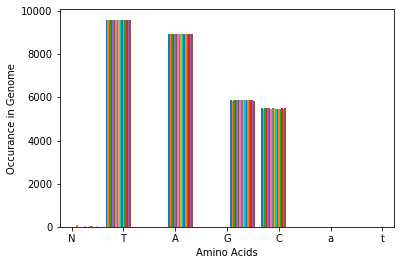

In [28]:
plt.hist(df["Viral Genome Sequences"]) # Plotting continuous data
plt.xlabel("Amino Acids")
plt.ylabel("Occurance in Genome")

Create bat dataframe containing bat sequence of interested region

In [35]:
bat_seq_subset = bat_seq[13000:21000]
bat_corpus = pd.DataFrame([[1, bat_seq_subset] 
                      ], 
                      columns=['id', 'sequence'])
bat_corpus

,id,sequence
0,1,"(T, T, A, C, A, A, G, C, T, G, G, T, A, A, T, ..."


Subsetting interested region to analyze from the whole viral genome

In [36]:
seq1_subset = my_seq1[13000:21000]
seq2_subset = my_seq2[13000:21000]
seq3_subset = my_seq3[13000:21000]
seq4_subset = my_seq4[13000:21000]
seq5_subset = my_seq5[13000:21000]
seq6_subset = my_seq6[13000:21000]
seq7_subset = my_seq7[13000:21000]
seq8_subset = my_seq8[13000:21000]
seq9_subset = my_seq9[13000:21000]
seq10_subset = my_seq10[13000:21000]
seq11_subset = my_seq11[13000:21000]
seq12_subset = my_seq12[13000:21000]
seq13_subset = my_seq13[13000:21000]
seq14_subset = my_seq14[13000:21000]
seq15_subset = my_seq15[13000:21000]

Create corpus dataframe of all the sequences for further analysis

In [37]:
corpus = pd.DataFrame([[1, seq1_subset], 
                       [2, seq2_subset], 
                       [3, seq3_subset], 
                       [4, seq4_subset],
                       [5, seq5_subset],
                       [6, seq6_subset], 
                       [7, seq7_subset], 
                       [8, seq8_subset], 
                       [9, seq9_subset], 
                       [10, seq10_subset], 
                       [11, seq11_subset], 
                       [12, seq12_subset], 
                       [13, seq13_subset], 
                       [14, seq14_subset], 
                       [15, seq15_subset], 
                       [16, bat_seq_subset], 
                      ], 
                      columns=['id', 'sequence'])
corpus

,id,sequence
0,1,"(T, T, A, G, C, T, G, C, C, A, C, A, G, T, A, ..."
1,2,"(T, T, A, G, C, T, G, C, C, A, C, A, G, T, A, ..."
2,3,"(T, T, A, G, C, T, G, C, C, A, C, A, G, T, A, ..."
3,4,"(T, T, A, G, C, T, G, C, C, A, C, A, G, T, A, ..."
4,5,"(T, T, A, G, C, T, G, C, C, A, C, A, G, T, A, ..."
5,6,"(T, T, A, G, C, T, G, C, C, A, C, A, G, T, A, ..."
6,7,"(T, T, A, G, C, T, G, C, C, A, C, A, G, T, A, ..."
7,8,"(T, T, A, G, C, T, G, C, C, A, C, A, G, T, A, ..."
8,9,"(T, T, A, G, C, T, G, C, C, A, C, A, G, T, A, ..."
9,10,"(T, T, A, G, C, T, G, C, C, A, C, A, G, T, A, ..."


Compute SGT embedding on the sequences. SGT extracts the short- and long-term sequence features and embeds them in a finite-dimensional feature space. The long and short term patterns embedded in SGT can be tuned without any increase in the computation by adjusting the kappa value. The higher the value the lesser the long-term dependency captured in the embedding.

In [150]:
sgt = SGT(kappa=10, 
          flatten=True, 
          lengthsensitive=False, 
          mode='default')
embedding_data = sgt.fit_transform(corpus)

In [151]:
embedding_data

,id,"(A, A)","(A, C)","(A, G)","(A, T)","(C, A)","(C, C)","(C, G)","(C, T)","(G, A)","(G, C)","(G, G)","(G, T)","(T, A)","(T, C)","(T, G)","(T, T)"
0,1.0,0.160445,0.165177,0.159782,0.158623,0.164107,0.158738,0.146792,0.162071,0.158788,0.162208,0.158446,0.162134,0.158660,0.156278,0.166721,0.159915
1,2.0,0.160445,0.165177,0.159782,0.158623,0.164107,0.158738,0.146792,0.162071,0.158788,0.162208,0.158446,0.162134,0.158660,0.156278,0.166721,0.159915
2,3.0,0.160445,0.165177,0.159782,0.158623,0.164107,0.158738,0.146792,0.162071,0.158788,0.162208,0.158446,0.162134,0.158660,0.156278,0.166721,0.159915
3,4.0,0.160445,0.165177,0.159782,0.158623,0.164107,0.158738,0.146792,0.162071,0.158788,0.162208,0.158446,0.162134,0.158660,0.156278,0.166721,0.159915
4,5.0,0.160458,0.165167,0.159766,0.158616,0.164065,0.158760,0.146905,0.162068,0.158796,0.162223,0.158426,0.162150,0.158691,0.156292,0.166700,0.159903
5,6.0,0.160445,0.165177,0.159790,0.158618,0.164107,0.158738,0.146800,0.162066,0.158800,0.162220,0.158466,0.162112,0.158653,0.156271,0.166700,0.159943
6,7.0,0.160445,0.165177,0.159782,0.158623,0.164107,0.158738,0.146792,0.162071,0.158788,0.162208,0.158446,0.162134,0.158660,0.156278,0.166721,0.159915
7,8.0,0.160445,0.165177,0.159782,0.158623,0.164107,0.158738,0.146792,0.162071,0.158788,0.162208,0.158446,0.162134,0.158660,0.156278,0.166721,0.159915
8,9.0,0.160445,0.165177,0.159782,0.158623,0.164107,0.158738,0.146792,0.162071,0.158788,0.162208,0.158446,0.162134,0.158660,0.156278,0.166721,0.159915
9,10.0,0.160445,0.165177,0.159782,0.158623,0.164107,0.158738,0.146792,0.162071,0.158788,0.162208,0.158446,0.162134,0.158660,0.156278,0.166721,0.159915


In [152]:
embedding_data.id = ["1","2","3","4","5","6", "7", "8", "9", "10", "11", "12", "13", "14", "15","16"]
embedding_data.rename(index={0: "Sequence 1", 1: "Sequence 2", 2: "Sequence 3", 3: "Sequence 4", 4: "Sequence 5", 5: "Sequence 6", 6: "Sequence 7", 7: "Sequence 8", 8: "Sequence 9", 9: "Sequence 10", 10: "Sequence 11", 11: "Sequence 12", 12: "Sequence 13", 13: "Sequence 14", 14: "Sequence 15", 15: "Bat Sequence"})

,id,"(A, A)","(A, C)","(A, G)","(A, T)","(C, A)","(C, C)","(C, G)","(C, T)","(G, A)","(G, C)","(G, G)","(G, T)","(T, A)","(T, C)","(T, G)","(T, T)"
Sequence 1,1,0.160445,0.165177,0.159782,0.158623,0.164107,0.158738,0.146792,0.162071,0.158788,0.162208,0.158446,0.162134,0.158660,0.156278,0.166721,0.159915
Sequence 2,2,0.160445,0.165177,0.159782,0.158623,0.164107,0.158738,0.146792,0.162071,0.158788,0.162208,0.158446,0.162134,0.158660,0.156278,0.166721,0.159915
Sequence 3,3,0.160445,0.165177,0.159782,0.158623,0.164107,0.158738,0.146792,0.162071,0.158788,0.162208,0.158446,0.162134,0.158660,0.156278,0.166721,0.159915
Sequence 4,4,0.160445,0.165177,0.159782,0.158623,0.164107,0.158738,0.146792,0.162071,0.158788,0.162208,0.158446,0.162134,0.158660,0.156278,0.166721,0.159915
Sequence 5,5,0.160458,0.165167,0.159766,0.158616,0.164065,0.158760,0.146905,0.162068,0.158796,0.162223,0.158426,0.162150,0.158691,0.156292,0.166700,0.159903
Sequence 6,6,0.160445,0.165177,0.159790,0.158618,0.164107,0.158738,0.146800,0.162066,0.158800,0.162220,0.158466,0.162112,0.158653,0.156271,0.166700,0.159943
Sequence 7,7,0.160445,0.165177,0.159782,0.158623,0.164107,0.158738,0.146792,0.162071,0.158788,0.162208,0.158446,0.162134,0.158660,0.156278,0.166721,0.159915
Sequence 8,8,0.160445,0.165177,0.159782,0.158623,0.164107,0.158738,0.146792,0.162071,0.158788,0.162208,0.158446,0.162134,0.158660,0.156278,0.166721,0.159915
Sequence 9,9,0.160445,0.165177,0.159782,0.158623,0.164107,0.158738,0.146792,0.162071,0.158788,0.162208,0.158446,0.162134,0.158660,0.156278,0.166721,0.159915
Sequence 10,10,0.160445,0.165177,0.159782,0.158623,0.164107,0.158738,0.146792,0.162071,0.158788,0.162208,0.158446,0.162134,0.158660,0.156278,0.166721,0.159915


Perform PCA on the embeddings in order to perform dimension reduction analysis and apply K-means clustering.

In [183]:
pca = PCA(n_components=3)
pca.fit(embedding_data)

X=pca.transform(embedding_data)

print(np.sum(pca.explained_variance_ratio_))
pca_df = pd.DataFrame(data=X, columns=['PC1', 'PC2', 'PC3'])
pca_df

0.9999999999811613


,PC1,PC2,PC3
0,-7.5,0.000141,-1.778719e-05
1,-6.5,0.000110,-1.645295e-05
2,-5.5,0.000079,-1.511872e-05
3,-4.5,0.000047,-1.378448e-05
4,-3.5,0.000062,1.144054e-04
5,-2.5,-0.000014,-1.383674e-05
6,-1.5,-0.000047,-9.781767e-06
7,-0.5,-0.000079,-8.447530e-06
8,0.5,-0.000110,-7.113293e-06
9,1.5,-0.000141,-5.779056e-06


In [184]:
seq_pca_df = pca_df.iloc[0:15,:]
seq_pca_df

,PC1,PC2,PC3
0,-7.5,0.000141,-1.778719e-05
1,-6.5,0.000110,-1.645295e-05
2,-5.5,0.000079,-1.511872e-05
3,-4.5,0.000047,-1.378448e-05
4,-3.5,0.000062,1.144054e-04
5,-2.5,-0.000014,-1.383674e-05
6,-1.5,-0.000047,-9.781767e-06
7,-0.5,-0.000079,-8.447530e-06
8,0.5,-0.000110,-7.113293e-06
9,1.5,-0.000141,-5.779056e-06


In [190]:
bat_pca_df = pca_df.iloc[[-1],:]
bat_pca_df

,PC1,PC2,PC3
15,7.5,0.001096,-0.000004


The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. 

/Users/ericabrophy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


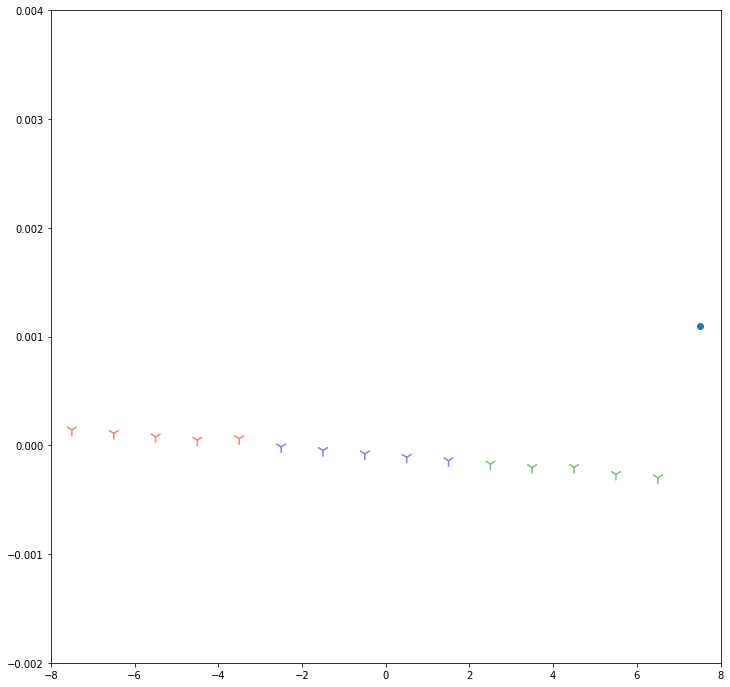

In [212]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(seq_pca_df)

labels = kmeans.predict(seq_pca_df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(12, 12))
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = list(map(lambda x: colmap[x+1], labels))


plt.scatter(seq_pca_df['PC1'], seq_pca_df['PC2'], color=colors, alpha=0.5, s=150, edgecolor=colors, marker="1")
plt.axis([-8, 8, -0.0020, 0.004])

fx = plt.subplot(1, 1, 1)
fx.scatter(bat_pca_df['PC1'], bat_pca_df['PC2'])


Scatter plot of the first two principal components expressing the variance in the sequences among the 15 patients and comparing them to one bat sequence. We can see the similarity in the 15 sequences as the vector is projected into this new space.

/Users/ericabrophy/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


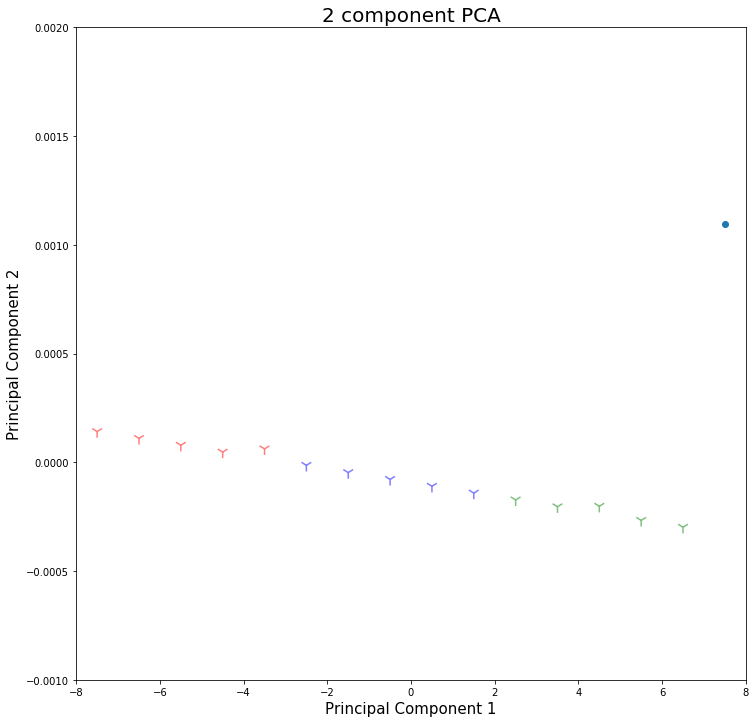

In [213]:
fig = plt.figure(figsize=(12, 12))
sx = plt.subplot(1, 1, 1)
sx.scatter(bat_pca_df['PC1'], bat_pca_df['PC2'])

            
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.axis([-8, 8, -0.0010, 0.002])
ax.scatter(seq_pca_df['PC1'], seq_pca_df['PC2'], color=colors, alpha=0.5, s=150, edgecolor=colors, marker="1")

3D-plot of the embeddings

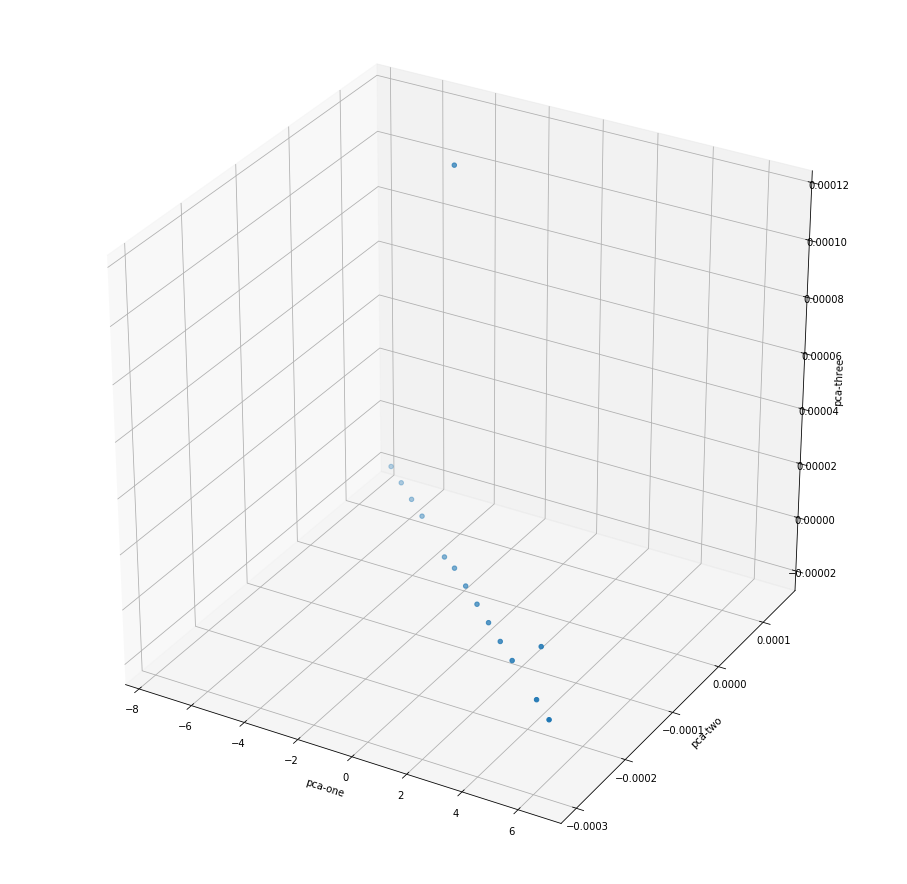

In [217]:
ax = plt.figure(figsize=(16,16)).gca(projection='3d')
ax.scatter(
    xs= seq_pca_df["PC1"], 
    ys=seq_pca_df["PC2"], 
    zs=seq_pca_df["PC3"],
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()